In [1]:
# importing packages

import pandas as pd
import numpy as no

import matplotlib.pyplot as plt
import seaborn as sns

#Scaling the data
from sklearn.preprocessing import StandardScaler

#K-Mean Clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

#Heirarchical Clustering
from scipy.cluster.hierarchy import linkage , dendrogram, cut_tree

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#using label encoder to change the class from string to integer.
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df['class'] = labelEncoder.fit_transform(df['class'].astype(str))

In [4]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


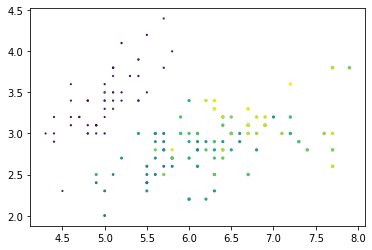

In [5]:
plt.scatter(df['sepallength'], df['sepalwidth'], df['petallength'], df['petalwidth'])

In [6]:
#Drop the ‘Class’(Target Column)
df.drop('class', axis=1, inplace=True  )
df.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['ID'] = 100+df.index
df.head()

,sepallength,sepalwidth,petallength,petalwidth,ID
0,5.1,3.5,1.4,0.2,100
1,4.9,3.0,1.4,0.2,101
2,4.7,3.2,1.3,0.2,102
3,4.6,3.1,1.5,0.2,103
4,5.0,3.6,1.4,0.2,104


In [8]:
df.shape


(150, 5)

In [9]:
scaler = StandardScaler()
iris = scaler.fit_transform(df[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']])
iris

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [11]:
dat1 = df.drop('ID', axis=1)
dat1.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
iris = pd.DataFrame(iris)
iris.columns = dat1.columns
iris.head()

,sepallength,sepalwidth,petallength,petalwidth
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [14]:
col = iris.columns
col

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth'], dtype='object')

In [15]:
list(enumerate(col))
for i in enumerate(col):
     print(i)
     #shows the columns of dataset

(0, 'sepallength')
(1, 'sepalwidth')
(2, 'petallength')
(3, 'petalwidth')


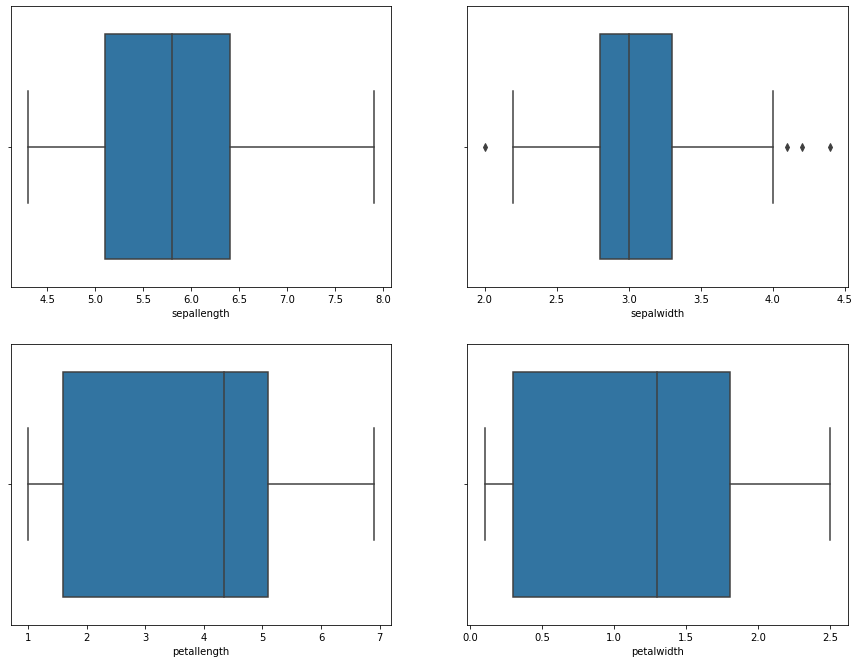

In [16]:
plt.figure(figsize = (15,30))
col = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
for i in enumerate(col):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x = i[1], data = df)

In [17]:
for i in col:
    q1 = df[i].quantile(0.01)
    q4 = df[i].quantile(0.99)
    df = df[(df[i]>=q1) & (df[i]<=q4)]

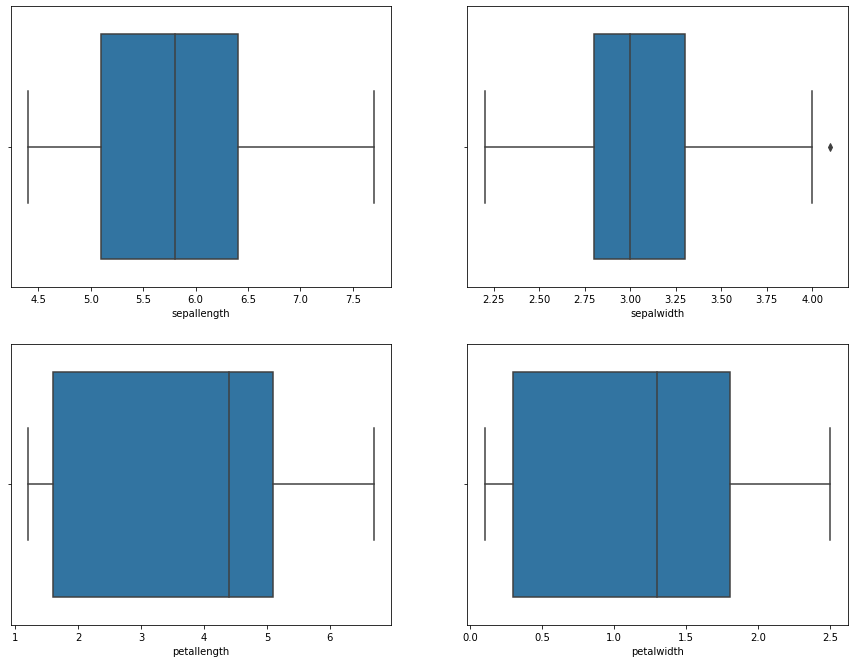

In [18]:
plt.figure(figsize = (15,30))
col = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
for i in enumerate(col):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x = i[1], data = df)

In [19]:
iris.shape

(150, 4)

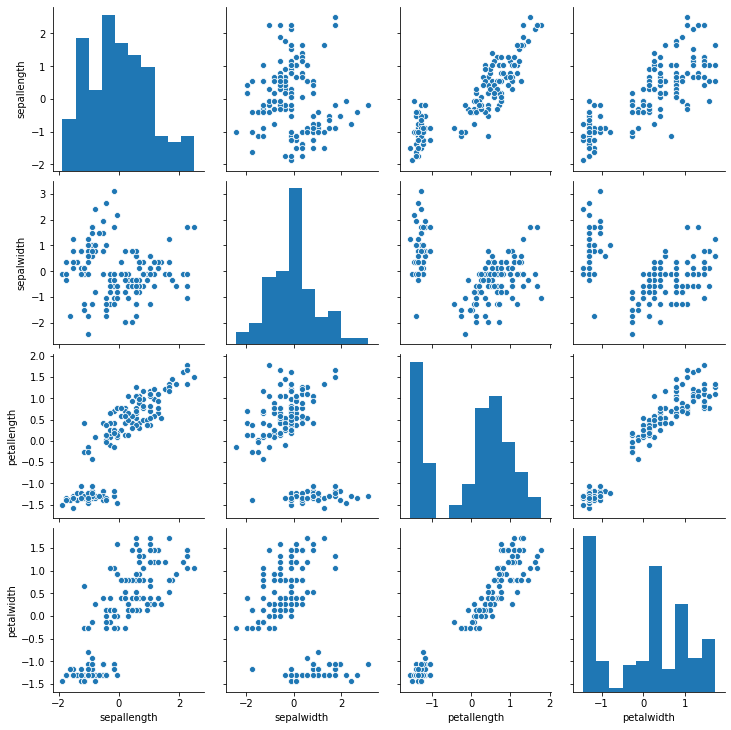

In [20]:
sns.pairplot(iris)

K means with 3 clusters

In [21]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
y_predicted = km.fit_predict(iris)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [23]:
iris['cluster'] = y_predicted
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,cluster
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


<function matplotlib.pyplot.legend(*args, **kwargs)>

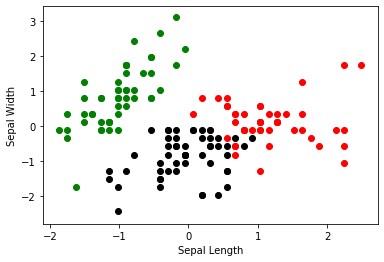

In [24]:
df1 = iris[iris.cluster==0]
df2 = iris[iris.cluster==1]
df3 = iris[iris.cluster==2]

plt.scatter(df1.sepallength, df1['sepalwidth'], color='green')
plt.scatter(df2.sepallength, df2['sepalwidth'], color='red')
plt.scatter(df3.sepallength, df3['sepalwidth'], color='black')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend

K-Means

In [25]:
sil = []
for k in range(2,10):
    kmean = KMeans(n_clusters = k).fit(iris)
    sil.append([k, silhouette_score(iris, kmean.labels_)])

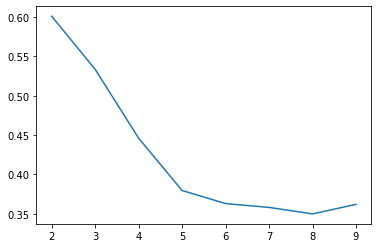

In [26]:
plt.plot(pd.DataFrame(sil)[0], pd.DataFrame(sil)[1])

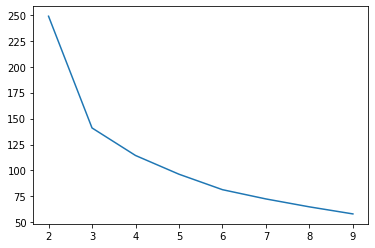

In [27]:
ssd = []
for k in range(2, 10):
    k_mean =KMeans(n_clusters = k).fit(iris)
    ssd.append([k, k_mean.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

Cluster 3, 5 

In [28]:
kmean3 = KMeans(n_clusters = 3, random_state = 50).fit(iris)

In [29]:
kmean3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [30]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,cluster
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


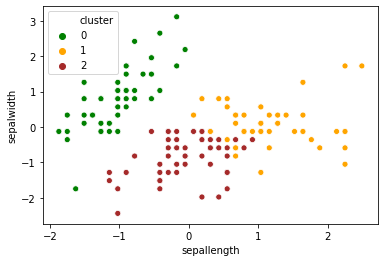

In [31]:
sns.scatterplot(x = 'sepallength', y  = 'sepalwidth', data = iris,  hue = 'cluster', palette = ['green', 'orange', 'brown'])

In [32]:
kmean5 = KMeans(n_clusters = 5, random_state = 50).fit(iris)

In [33]:
kmean5.labels_

array([3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3,
       3, 0, 3, 0, 3, 0, 4, 4, 4, 2, 1, 1, 4, 2, 1, 2, 2, 1, 2, 1, 1, 4,
       1, 2, 2, 2, 4, 1, 1, 1, 1, 4, 4, 4, 1, 2, 2, 2, 2, 1, 1, 4, 4, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 4, 1, 4, 4, 4, 4, 2, 4, 4, 4,
       4, 4, 4, 1, 1, 4, 4, 4, 4, 2, 4, 1, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4,
       4, 1, 1, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 1])

In [34]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,cluster
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


Heirarchical Clustering

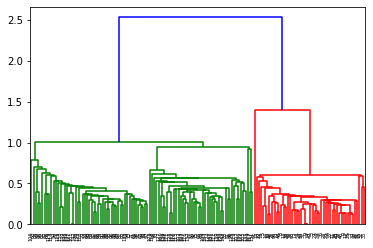

In [35]:
## Heirarchical Clustering
mergings = linkage(iris, method = 'single', metric = 'euclidean')
dendrogram(mergings)
plt.show()

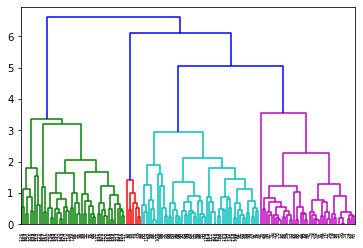

In [36]:
mergings = linkage(iris, method = 'complete', metric = 'euclidean')
dendrogram(mergings)
plt.show()

Cluster = 3

In [37]:
h_label = pd.Series(cut_tree(mergings, n_clusters =3).reshape(-1,))

In [38]:
h_label

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    0
147    2
148    2
149    0
Length: 150, dtype: int32

In [39]:
iris.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'cluster'], dtype='object')

In [41]:
dat_h = pd.concat([df, h_label], axis = 1)
dat_h.columns = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'ID', 'cluster_id']
dat_h.head()

,sepallength,sepalwidth,petallength,petalwidth,ID,cluster_id
0,5.1,3.5,1.4,0.2,100.0,0
1,4.9,3.0,1.4,0.2,101.0,0
2,4.7,3.2,1.3,0.2,102.0,0
3,4.6,3.1,1.5,0.2,103.0,0
4,5.0,3.6,1.4,0.2,104.0,0


In [42]:
dat_h.cluster_id.value_counts()

0    96
2    47
1     7
Name: cluster_id, dtype: int64

In [43]:
df_test = pd.read_csv('IRIS.csv')
df_test['ID'] = 100+df_test.index
df_test.head()

,sepallength,sepalwidth,petallength,petalwidth,class,ID
0,5.1,3.5,1.4,0.2,Iris-setosa,100
1,4.9,3.0,1.4,0.2,Iris-setosa,101
2,4.7,3.2,1.3,0.2,Iris-setosa,102
3,4.6,3.1,1.5,0.2,Iris-setosa,103
4,5.0,3.6,1.4,0.2,Iris-setosa,104


In [44]:
test = pd.merge(dat_h, df_test[['ID', 'class']], on = 'ID')
test.head()

,sepallength,sepalwidth,petallength,petalwidth,ID,cluster_id,class
0,5.1,3.5,1.4,0.2,100.0,0,Iris-setosa
1,4.9,3.0,1.4,0.2,101.0,0,Iris-setosa
2,4.7,3.2,1.3,0.2,102.0,0,Iris-setosa
3,4.6,3.1,1.5,0.2,103.0,0,Iris-setosa
4,5.0,3.6,1.4,0.2,104.0,0,Iris-setosa


In [48]:
#using label encoder to change the class from string to integer.
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df_test['class'] = labelEncoder.fit_transform(df_test['class'].astype(str))

In [49]:
test = pd.merge(dat_h, df_test[['ID', 'class']], on = 'ID')
test.head()

,sepallength,sepalwidth,petallength,petalwidth,ID,cluster_id,class
0,5.1,3.5,1.4,0.2,100.0,0,0
1,4.9,3.0,1.4,0.2,101.0,0,0
2,4.7,3.2,1.3,0.2,102.0,0,0
3,4.6,3.1,1.5,0.2,103.0,0,0
4,5.0,3.6,1.4,0.2,104.0,0,0


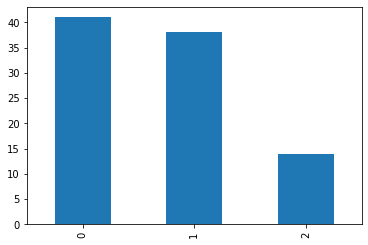

In [51]:
test[test['cluster_id']==0]['class'].value_counts().plot(kind = 'bar')

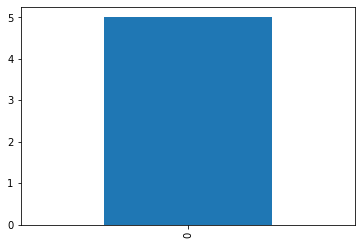

In [52]:
test[test['cluster_id']==1]['class'].value_counts().plot(kind = 'bar')

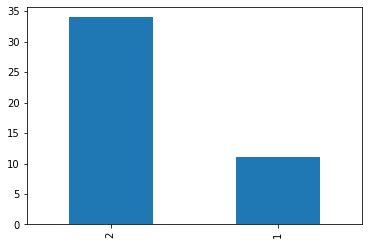

In [53]:
test[test['cluster_id']==2]['class'].value_counts().plot(kind = 'bar')